### downlode data then visulisation
- Downlode
- lode
- visulviation
- Normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=pd.read_csv('Linear_X_Train.csv')
y=pd.read_csv('Linear_Y_Train.csv')

x.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [3]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [4]:
print(x.shape,y.shape)

(3750, 1) (3750, 1)


Text(0.5, 1.0, 'hardwork bs performance')

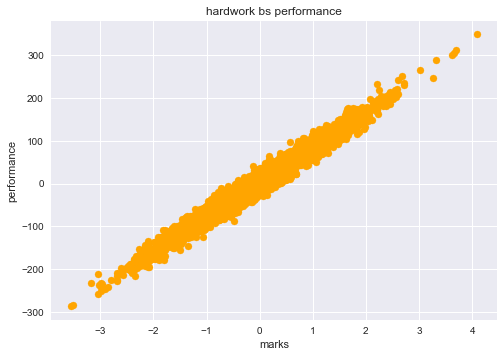

In [5]:
#visulisation data
plt.style.use('seaborn')
plt.scatter(x,y,color='orange')
plt.xlabel('marks')
plt.ylabel('performance')
plt.title("hardwork bs performance")

In [6]:
x.shape
type(x)
x=x.values

In [7]:
y.shape
type(y)
y=y.values

In [8]:
#normalization
u=x.mean()
d=x.std()
x=(x-u)/d
print(x)

[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ...
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]


In [46]:
#hypothisis calclute
def hypothesis(x,theta):
    y_=theta[0]+x*theta[1]
    return y_

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=hypothesis(x,theta)
        grad[0]+=(y_-y)
        grad[1]+=((y_-y)*x)
        
    return grad/m

def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error+=(y_ -Y[i])**2
    return total_error/m

def gradientdecent(X,Y,learnig_rate=0.1,max_step=100):
    
    theta=np.zeros((2,))
    error_list=[]
    for i in range(max_step):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        #update theta
        theta[0]=theta[0]-learnig_rate*grad[0]
        theta[1]=theta[1]-learnig_rate*grad[1]
        
    return theta,error_list
    
        

In [47]:
theta,error_list=gradientdecent(x,y)

In [48]:
theta

array([ 0.6838508 , 79.90361453])

In [49]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

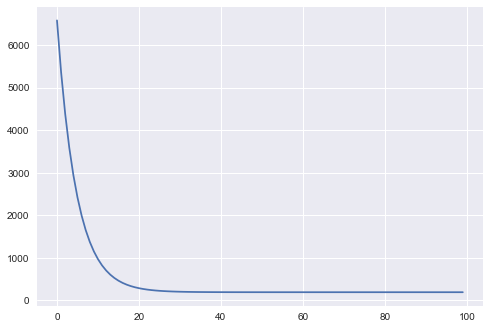

In [50]:
plt.plot(error_list)

# Prediction and Best Line

In [51]:
y_=hypothesis(x,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


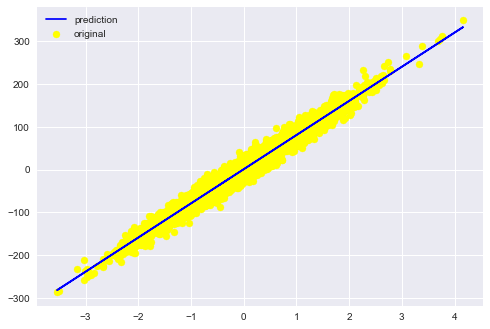

In [52]:
#plot traning + prediction
plt.plot(x,y_,color='blue',label='prediction')
plt.scatter(x,y,color='yellow',label='original')
plt.legend()
plt.show()

In [53]:
x_test=pd.read_csv('Linear_X_Test.csv').values
y_test=hypothesis(x_test,theta)

In [54]:
df=pd.DataFrame(data=y_test,columns=['y'])


In [55]:
df.to_csv('y_drediction.csv',index=False)

In [56]:
y_test

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

# scoring

In [57]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1-num/denom)
    return score*100

In [58]:
r2_score(y,y_)

97.09612226971643

# visualisation loss fuction,Gradient desent,Theta update